# AB testing

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.stats as st
from scipy.stats import norm


In [3]:
not_in_trial = pd.read_csv('not_in_trial.csv')

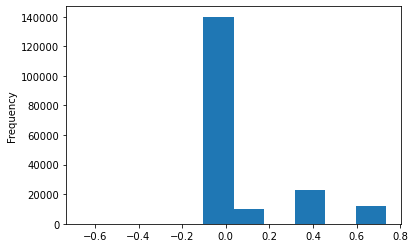

In [4]:
not_in_trial.join_fee.plot(kind = 'hist') # find some records's join fees are < 0

In [5]:
not_in_trial[not_in_trial.join_fee < 0].shape
# 13 records with join fees < 0
# decide to ignore them when sum join fees

(13, 35)

In [6]:
not_in_trial.join_fee.describe() 
# total case 185083

count    185083.000000
mean          0.111453
std           0.175980
min          -0.660600
25%           0.036700
50%           0.036700
75%           0.036700
max           0.734000
Name: join_fee, dtype: float64

In [7]:
# do no include records with negative join fees (13 records)
take_join_fee_size = not_in_trial[not_in_trial.join_fee>0].shape[0]# 153116 took join fee
not_take_join_fee_size = not_in_trial[not_in_trial.join_fee == 0].shape[0] # 31954 not taken join fee
print(not_take_join_fee_size) 
print(take_join_fee_size) 

31954
153116


In [8]:
# compute the conversion rate of people who are charged join fees when sign up
take_fee_con_r = not_in_trial[(not_in_trial.join_fee>0) & (not_in_trial.user_label != 'never_sub')].shape[0]/take_join_fee_size
take_fee_con_r

0.587841897646229

In [9]:
# compute the conversion rate of people who are not charged join fees when sign up
not_take_fee_con_r = not_in_trial[(not_in_trial.join_fee ==0) & (not_in_trial.user_label != 'never_sub')].shape[0]/not_take_join_fee_size
not_take_fee_con_r

0.5605870939475496

In [13]:
# Conducting the A/B test 
# if we assume one sample (Variant B: not taking join fees) and Variant A (taking join fees) as baseline = population, p_f and n_f are variant A stats
# we do a one-sample and one-side hypotheis test, confidence = 1- alpha
# Ha: Not Taking join fees can decrease the user conversion rate
# Ha: conversion_rate_B < conversion_rate_A (left tail)
def do_abtesting(pa, pb, b_size, alpha, num_sides_f = 1 ):
    """
    pa: the conversion rate of variant A
    pb: the conversion rate of variant B
    b_size: the sample size of variant B
    alpha: stantistic significance
    """
    # calculating the Z-score of variant B
    stv_b = math.sqrt(pa*(1-pa)/b_size)
    # print(stv_b)
    z_b = (pb - pa)/stv_b
   # print(z_b)
    # comparing the z-score to the value of statistical significance at the level of a
    # one-tailed test
    z_confi = norm.ppf((alpha/num_sides_f)) # or 1-alpha
    # get p value:
    p_value = ((1-norm.cdf(abs(z_b))) * num_sides_f)
    if z_b > z_confi:
        print('z-score of variant b: %3.3f > z-score of the confidence rate: %3.3f, the p value is %3.1f%%' %(z_b, z_confi, 100*p_value))
        print()
        print('We fail to reject the null hypothesis given that confidence rate.' )
        print('There is no evidence to support the claim that implementing alternative B can decrease the conversion rates over applying alternative A.')
        print('Therefore, implementing alternative B can decrease the conversion rate over applying alternative A.')
    else:
        print('z-score of variant b: %3.3f < z-score of the confidence rate: %3.3f, the p value is %3.1f%%' %(z_b, z_confi, 100*p_value))
        print()
        print('We reject the null hypothesis given that confidence rate.')
        print()
        print('Therefore, implementing alternative B can decrease the conversion rate over applying alternative A.')
       

In [14]:
# one-side test
do_abtesting(pa = take_fee_con_r, pb = not_take_fee_con_r,b_size =  not_take_join_fee_size, alpha = 0.05, num_sides_f =1)

z-score of variant b: -9.898 < z-score of the confidence rate: -1.645, the p value is 0.0%

We reject the null hypothesis given that confidence rate.

Therefore, implementing alternative B can decrease the conversion rate over applying alternative A.


# A/B test Conclusion
Not charing join fees led to a 2.73% decrease in conversions at the 95% confidence level.
 The company should charge join fees from people.